In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("crime_safety_dataset.csv")
df.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other


In [4]:
df.tail()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race
995,996,2023-02-23,07:24:57,Assault,New York,NY,2793 Oak St,72,Female,Asian
996,997,2024-10-15,18:10:35,Drug Offense,San Jose,CA,2798 Elm St,26,Male,Other
997,998,2024-02-08,04:00:11,Assault,Houston,TX,8950 Pine St,34,Non-binary,Hispanic
998,999,2023-01-18,16:52:36,Homicide,Chicago,IL,4673 Oak St,16,Other,Hispanic
999,1000,2022-07-19,01:28:45,Homicide,Los Angeles,CA,5226 Oak St,54,Male,White


In [5]:
df.shape

(1000, 10)

In [6]:
df.columns

Index(['id', 'date', 'time', 'crime_type', 'city', 'state',
       'location_description', 'victim_age', 'victim_gender', 'victim_race'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    1000 non-null   int64 
 1   date                  1000 non-null   object
 2   time                  1000 non-null   object
 3   crime_type            1000 non-null   object
 4   city                  1000 non-null   object
 5   state                 1000 non-null   object
 6   location_description  1000 non-null   object
 7   victim_age            1000 non-null   int64 
 8   victim_gender         1000 non-null   object
 9   victim_race           1000 non-null   object
dtypes: int64(2), object(8)
memory usage: 78.3+ KB


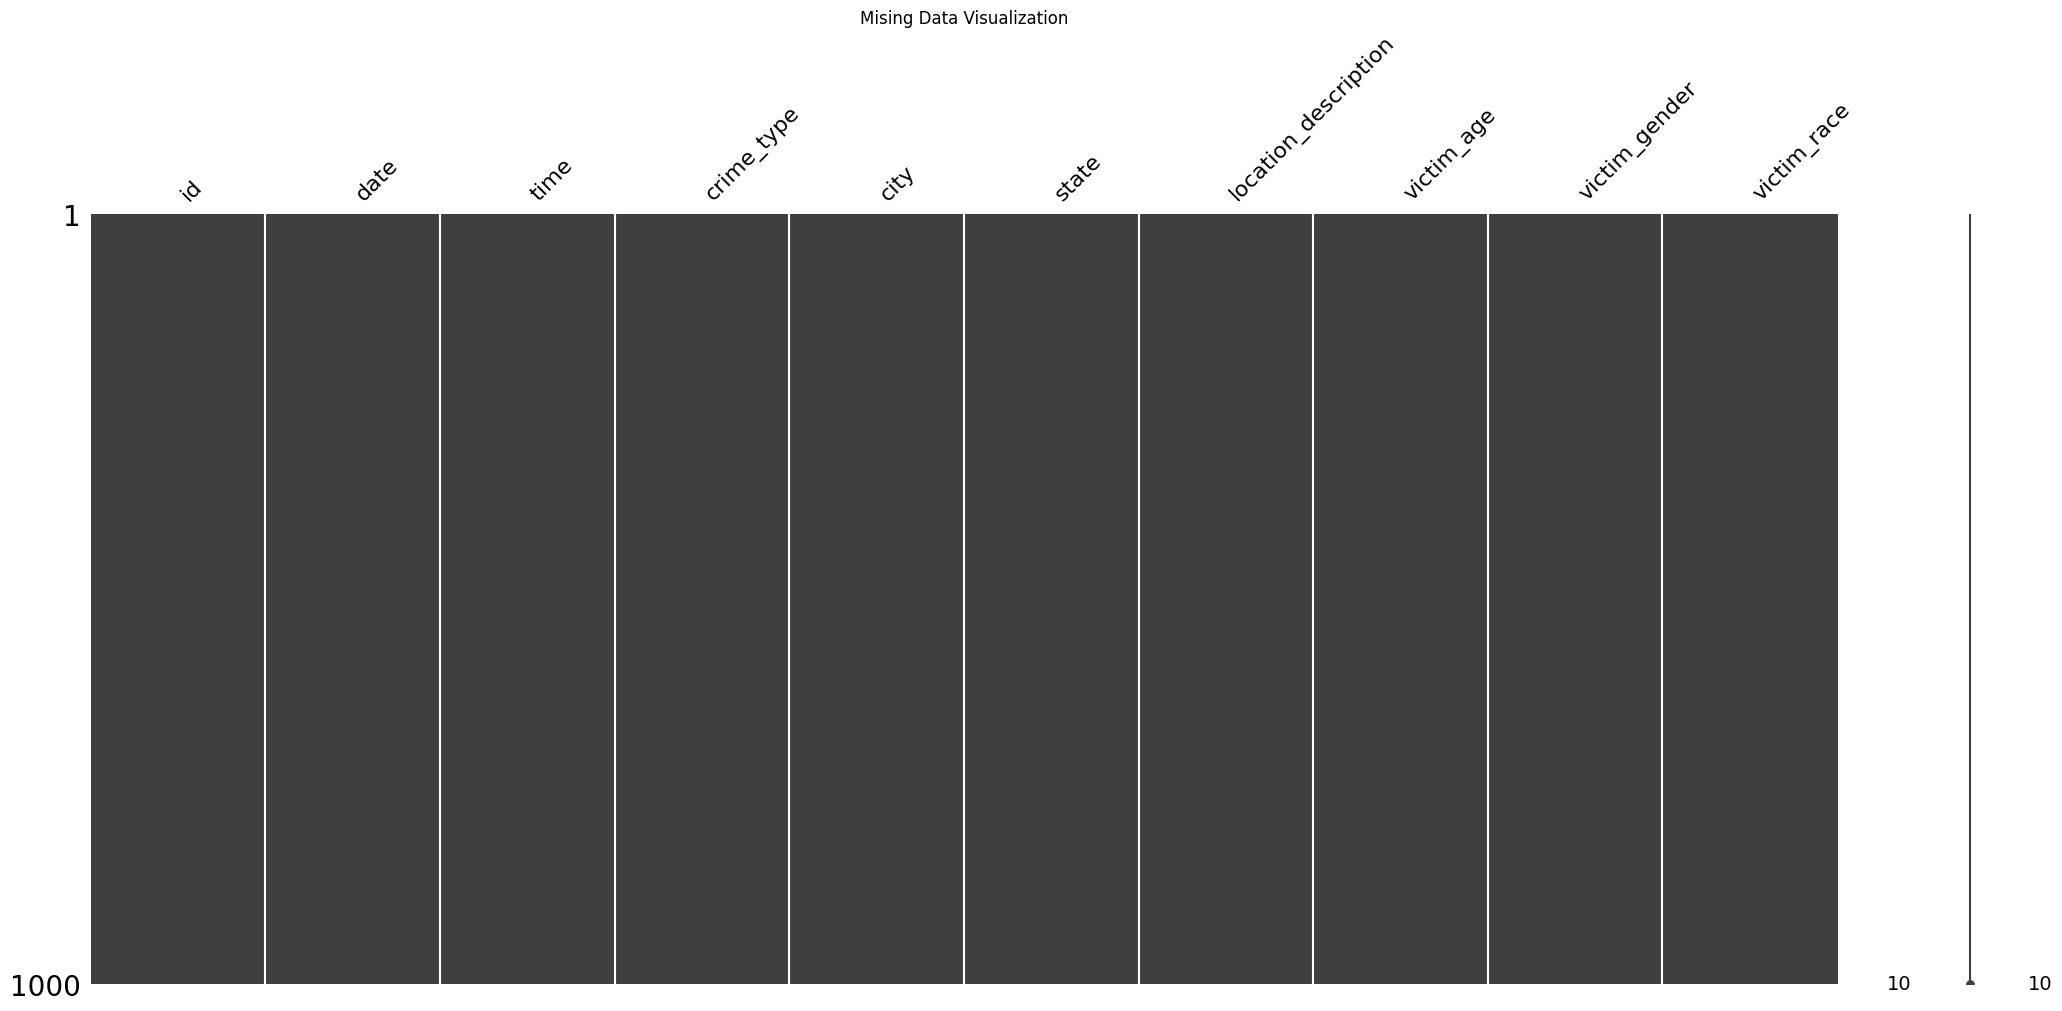

In [8]:
msno.matrix(df)
plt.title("Mising Data Visualization")
plt.show()

In [9]:
df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"])

df["hour"] = df["datetime"].dt.hour
df["dayofweek"] = df["datetime"].dt.dayofweek
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1000 non-null   int64         
 1   date                  1000 non-null   object        
 2   time                  1000 non-null   object        
 3   crime_type            1000 non-null   object        
 4   city                  1000 non-null   object        
 5   state                 1000 non-null   object        
 6   location_description  1000 non-null   object        
 7   victim_age            1000 non-null   int64         
 8   victim_gender         1000 non-null   object        
 9   victim_race           1000 non-null   object        
 10  datetime              1000 non-null   datetime64[ns]
 11  hour                  1000 non-null   int32         
 12  dayofweek             1000 non-null   int32         
 13  month              

In [11]:
df.head()

,id,date,time,crime_type,city,state,location_description,victim_age,victim_gender,victim_race,datetime,hour,dayofweek,month,year
0,1,2022-09-09,18:58:57,Homicide,Philadelphia,PA,9916 Broadway,34,Male,Other,2022-09-09 18:58:57,18,4,9,2022
1,2,2022-07-10,12:10:59,Assault,Phoenix,AZ,6853 Oak St,13,Female,Black,2022-07-10 12:10:59,12,6,7,2022
2,3,2024-12-31,09:26:12,Burglary,San Antonio,TX,3760 Maple Ave,23,Male,Asian,2024-12-31 09:26:12,9,1,12,2024
3,4,2024-04-12,23:17:28,Vandalism,Philadelphia,PA,6781 Main St,36,Other,Asian,2024-04-12 23:17:28,23,4,4,2024
4,5,2023-07-19,04:49:39,Fraud,San Antonio,TX,3239 Broadway,26,Other,Other,2023-07-19 04:49:39,4,2,7,2023


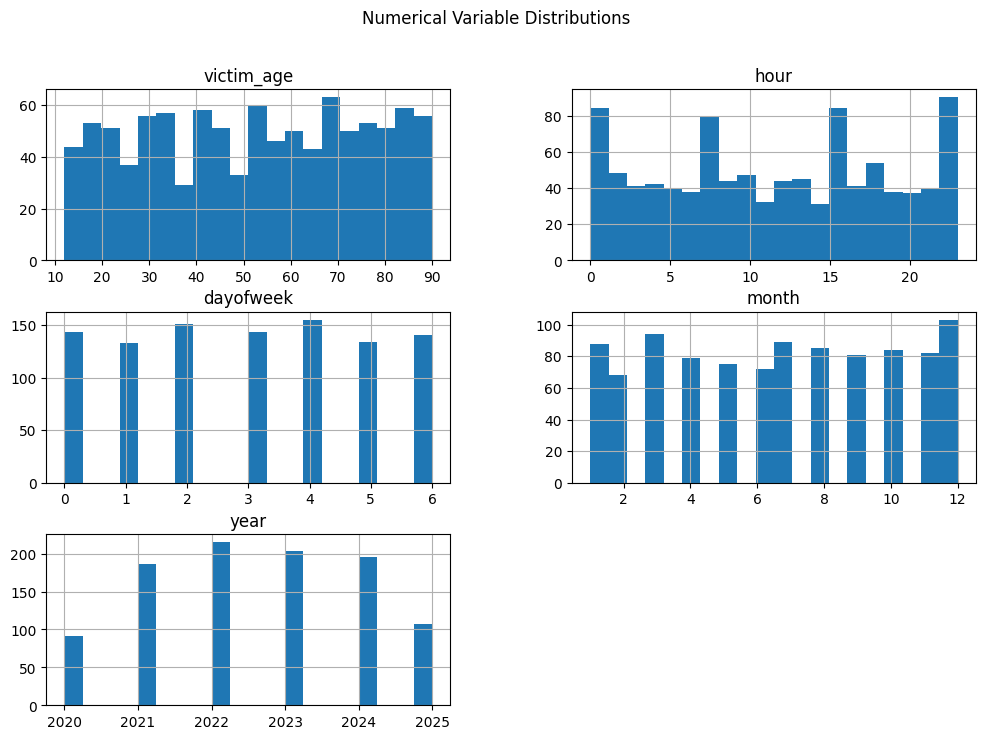

In [12]:
numeric_cols = ["victim_age", "hour", "dayofweek", "month", "year"]

df[numeric_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Numerical Variable Distributions")
plt.show()

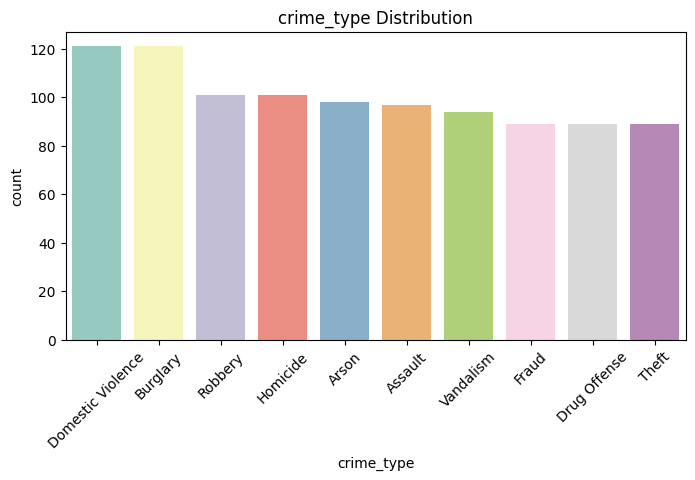

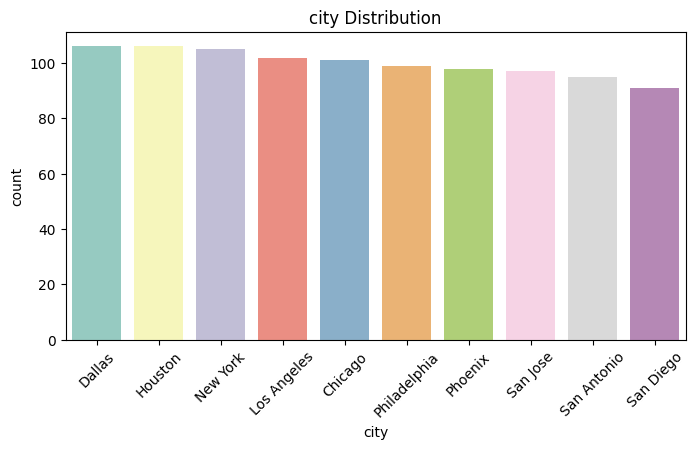

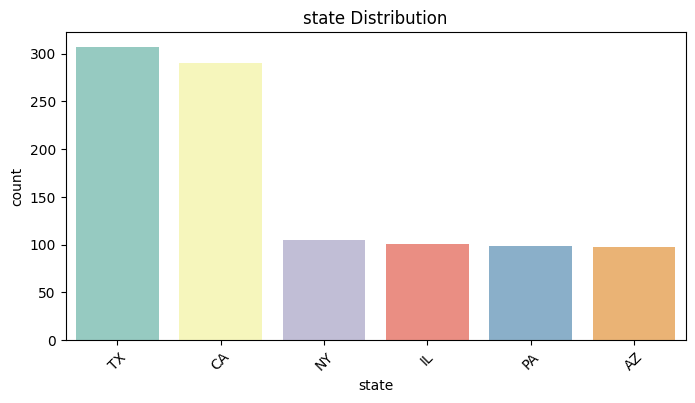

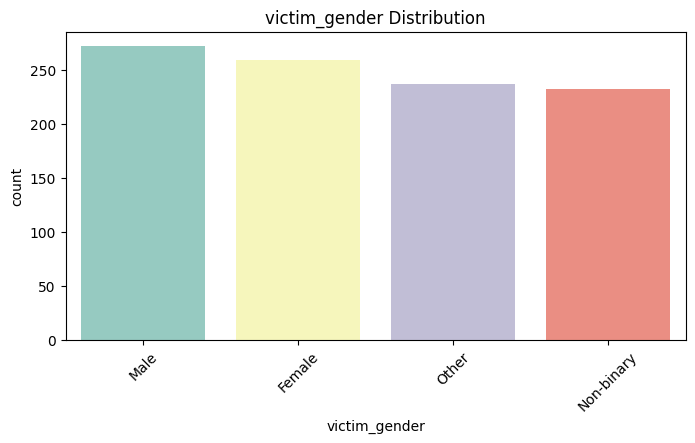

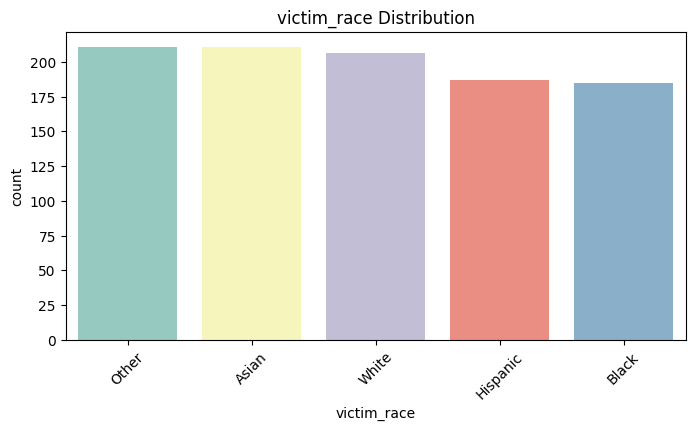

In [45]:
categorical_cols = ["crime_type", "city", "state", "victim_gender", "victim_race"]

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="Set3")
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()

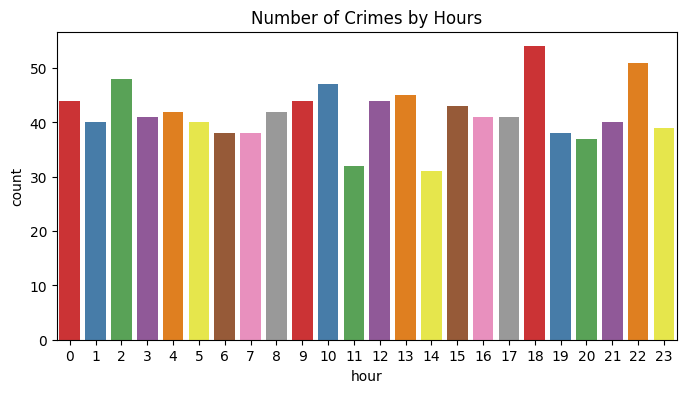

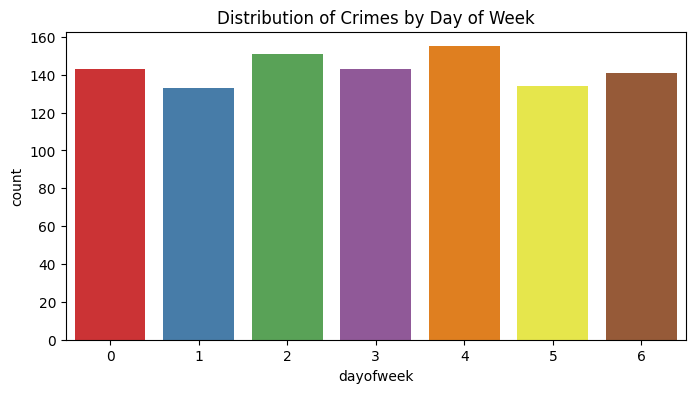

In [52]:
plt.figure(figsize=(8,4))
sns.countplot(x="hour", data=df, palette="Set1")
plt.title("Number of Crimes by Hours")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x="dayofweek", data=df, palette="Set1")
plt.title("Distribution of Crimes by Day of Week")
plt.show()